# NETFLIX MOVIES AND TV SHOWS

# Importing The Libraries

In [5]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Attaching The Dataset

In [6]:
df = dd.read_csv('netflix_titles.csv',lineterminator = '\n')

# First And Last 5 Rows of the Dataset

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Listing Data Types and Columns

In [11]:
df.dtypes
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 12 entries, show_id to description
dtypes: int64(1), string(11)

In [25]:
df.describe()

,release_year
npartitions=1,
,float64
,...


In [36]:
# Check the number of rows and columns
df.shape

(<dask_expr.expr.Scalar: expr=Assign(frame=ReadCSV(dadfee5)).size() // 13, dtype=int32>,
 13)

# Checking For Duplicate Values

In [21]:
df['is_duplicate'] = df.map_partitions(lambda pdf: pdf.duplicated(), meta=('is_duplicate', 'bool'))
df['is_duplicate'].sum().compute()

0

In [23]:
df.fillna("Unknown")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_duplicate
npartitions=1,,,,,,,,,,,,,
,string,string,string,string,string,string,string,int64,string,string,string,string,bool
,...,...,...,...,...,...,...,...,...,...,...,...,...


# Counting Unique Values In Each Column

In [28]:
df['type'].value_counts().compute()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [30]:
df['country'].value_counts().nlargest(10).compute()

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [32]:
df['listed_in'].str.split(', ').explode().value_counts().nlargest(10).compute()

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [34]:
df['release_year'].value_counts().compute()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

# Convert Date Time Format

In [39]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = dd.to_datetime(df['date_added'], errors='coerce')

In [41]:
# Extract day, month, and year
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df[['date_added', 'day_added', 'month_added', 'year_added']].compute().head()

,date_added,day_added,month_added,year_added
0,2021-09-25,25.0,9.0,2021.0
1,2021-09-24,24.0,9.0,2021.0
2,2021-09-24,24.0,9.0,2021.0
3,2021-09-24,24.0,9.0,2021.0
4,2021-09-24,24.0,9.0,2021.0


In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_duplicate,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,25,9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False,24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False,24,9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,24,9,2021


# Visualizations

# Movies And TV Shows

In [46]:
df = df.compute()

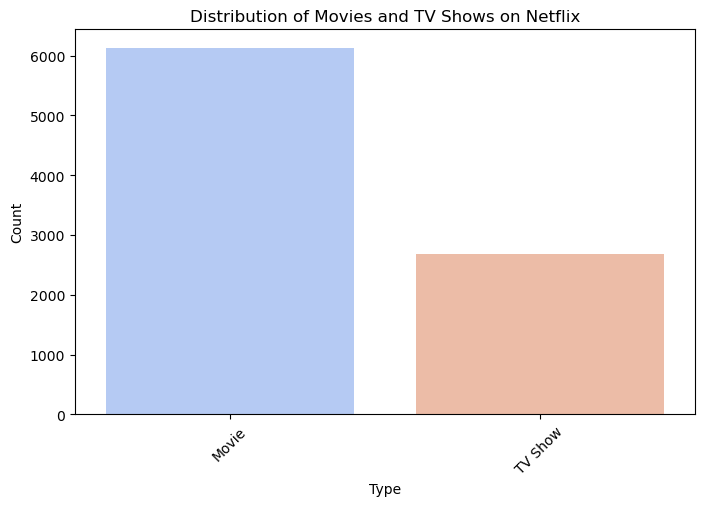

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='type', palette='coolwarm', legend=False) 
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

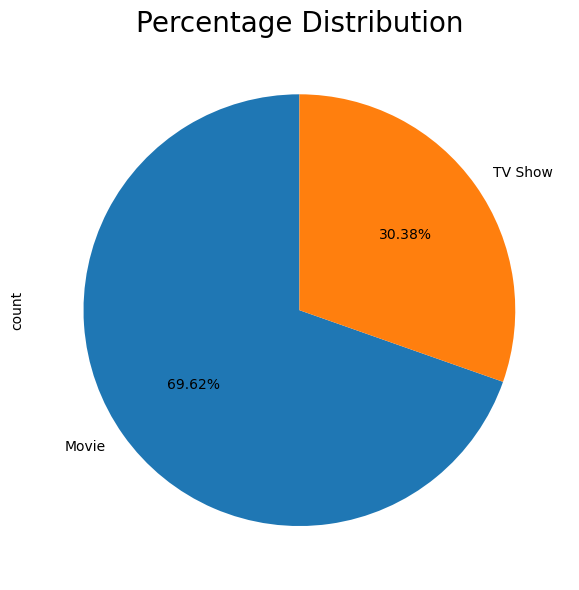

In [61]:
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

#### Observation:

Movies has more number of counts than TV Shows.<br>
31% of the data are from TV shows, while 69% of the data are from movies.

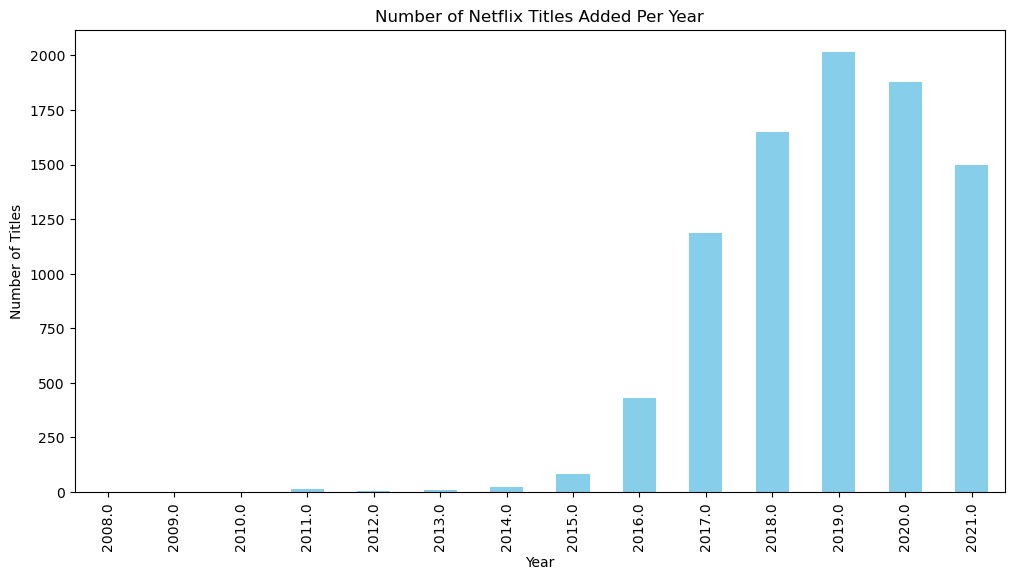

In [65]:
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
content_per_year.plot(kind='bar', color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles Added Per Year")
plt.show()

#### Observation:
The majority of movies released in Netflix in the year 2019.

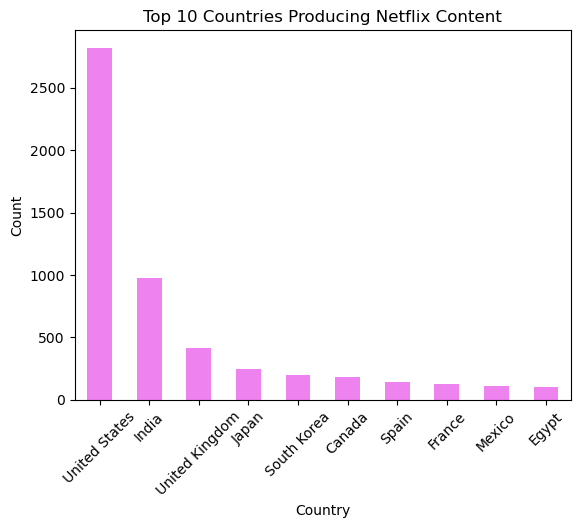

In [70]:
top_countries = df['country'].value_counts().nlargest(10)
top_countries.plot(kind='bar', color='violet')

plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.grid(False) 
plt.show()

#### Observation:
The bar chart represents the top 10 countries that have produced the most content on Netflix.<br>
The x-axis lists the countries, while the y-axis shows the number of titles available from each country.<br>
The United States typically leads in content production, followed by other major contributors such as India, the United Kingdom, and Canada.<br>
These trends reflect Netflix’s global expansion strategy and partnerships with regional content creators.

# Top 10 Genres On Netflix:

In [74]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().nlargest(10)
print("Top 10 Most Popular Genres on Netflix:\n", top_genres)

Top 10 Most Popular Genres on Netflix:
 listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


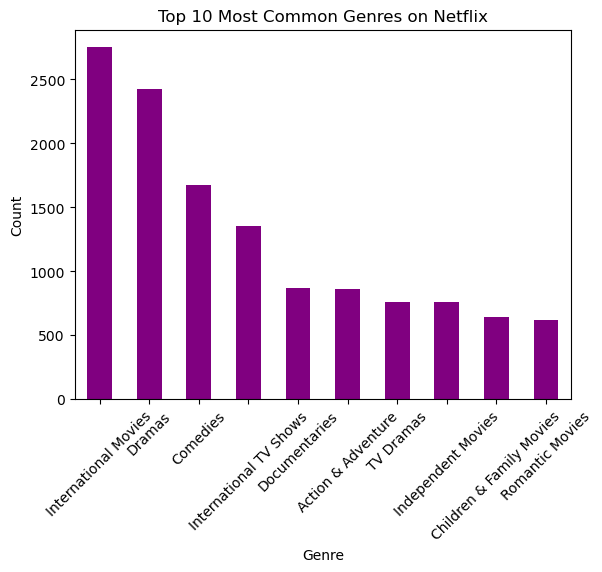

In [76]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
genres.nlargest(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Observation
From the analysis, we can see that Drama and Comedy dominate as the most common genres, reflecting Netflix’s focus on diverse storytelling
and entertainment.<br>
Other prominent genres, such as Documentaries, Action & Adventure, and Thrillers, indicate the platform’s investment in informative content
and high-energy productions.<br>
The presence of genres like Romantic, Horror, and Crime TV Shows further highlights the varied preferences of Netflix viewers.
This insight helps understand content trends on Netflix, suggesting that users are likely to find a wide range of content in these dominant genres. <br>
It also provides valuable information for content creators and analysts looking to explore Netflix’s catalog trends over time.

# Top 10 movies and TV Shows As Per Rating

In [81]:
top_movies = df[df['type'] == 'Movie']['rating'].value_counts().nlargest(10)
print("Top 10 Movies by Age Rating:\n", top_movies)

top_tv_shows = df[df['type'] == 'TV Show']['rating'].value_counts().nlargest(10)
print("\nTop 10 TV Shows by Age Rating:\n", top_tv_shows)


Top 10 Movies by Age Rating:
 rating
TV-MA    2062
TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     139
TV-Y      131
TV-G      126
NR         75
Name: count, dtype: int64

Top 10 TV Shows by Age Rating:
 rating
TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: count, dtype: int64


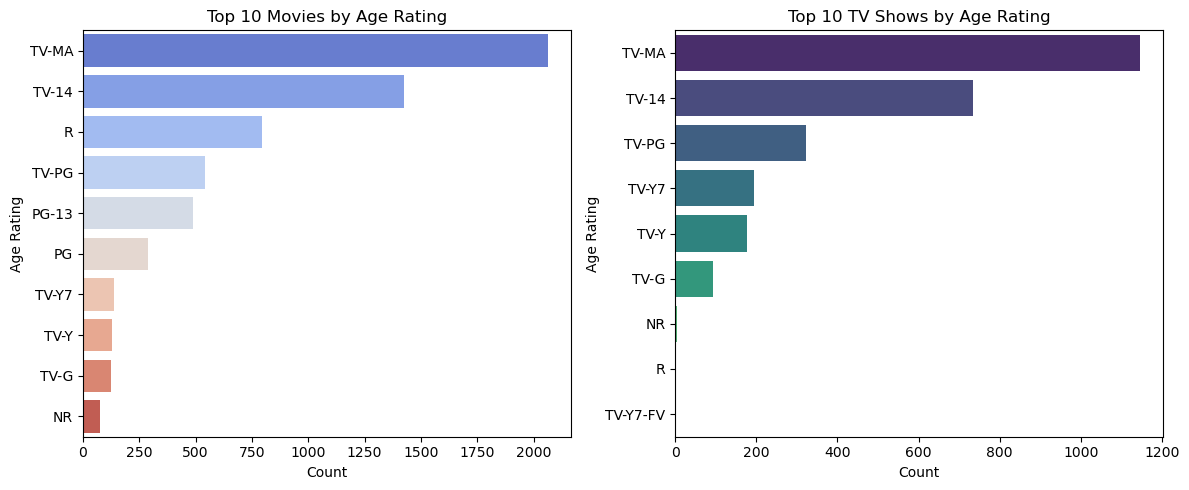

In [83]:
top_movies = df[df['type'] == 'Movie']['rating'].value_counts().nlargest(10)

top_tv_shows = df[df['type'] == 'TV Show']['rating'].value_counts().nlargest(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Movies
sns.barplot(y=top_movies.index, x=top_movies.values, ax=axes[0], hue=top_movies.index, legend=False, palette="coolwarm")
axes[0].set_title("Top 10 Movies by Age Rating")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Age Rating")
axes[0].grid(False)

# Plot for TV Shows
sns.barplot(y=top_tv_shows.index, x=top_tv_shows.values, ax=axes[1], hue=top_tv_shows.index, legend=False, palette="viridis")
axes[1].set_title("Top 10 TV Shows by Age Rating")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Age Rating")
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Saving And Updating The Dataset

In [11]:
df.to_csv("updated_netflix_dataset.csv", index=False)
print("Dataset saved successfully as 'updated_netflix_dataset.csv'.")


Dataset saved successfully as 'updated_netflix_dataset.csv'.


# End Of The Notebook